# Processing of 2019-01-22 XapR Titration

© 2019 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

This notebook analyzes the processed data from 2019-01-22. As this experiment was exploratory in nature, the exporatory data analysis is performed in this notebook for commentary and reproduciblity. 

In [96]:
import sys
sys.path.insert(0, '../../../')
import numpy as np
import pandas as pd
import altair as alt
import altair_catplot as altcat
import act.viz
import act.bayes
import bebi103.viz
import bokeh.io
alt.data_transformers.enable('json')
colors = act.viz.pub_style()
bokeh.io.output_notebook()

Loading BokehJS ...

In this experiment, we grew multiple strains with varying concentrations of ATC (controlling XapR expression) and XAN (inducer for xapR). This notebook is broken into three primary sections -- 1. exploring autofluorescence variation 2. inference of the fluorescence calibration factor, and 3) exploring inducibility.

## Effect of Xanthosine on autofluorescence

I don't have a good idea of how xanthosine influences autofluorescence writ large. To see if there is any appreciable effect on autofluorescence, we measured the autofluorescence in both channels in presence and absence of xanthosine. Let's look at the distributions in both channels (with both promoters)

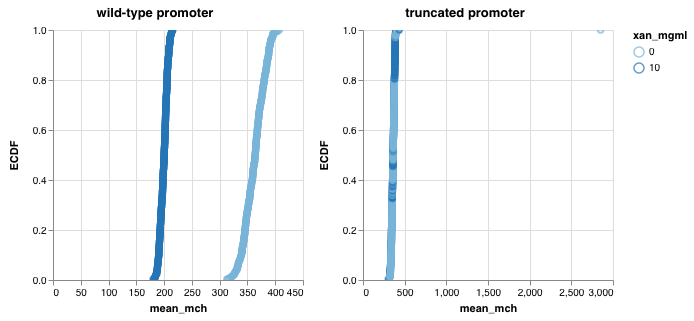

In [3]:
# Set up the charts. 
snaps = pd.read_csv('output/20190122_snapshots.csv')
wt = altcat.catplot(snaps[(snaps['strain']=='auto') &
                        (snaps['promoter']=='wt')],
                width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_mch:Q', color='xan_mgml:O'),
                transform='ecdf',
                   **(dict(title='wild-type promoter'))).interactive()
simple = altcat.catplot(snaps[(snaps['strain']=='auto') &
                            (snaps['promoter']=='simple')],
                width=250, height=250,
                mark='point',
                encoding=dict(x='mean_mch:Q', color='xan_mgml:O'),
                transform='ecdf', **(dict(title='truncated promoter'))).interactive()

wt | simple

It looks like I made a mistake with the camera settings for one shot of the wild-type promoter settings. As the truncated promoter settings (which was the same for the remainder of the experiment) shows that there is no appreciable difference in autofluorescence between the presence and absence of xanthosine in the mcherry channel. 

We can look at the YFP signal as well.  

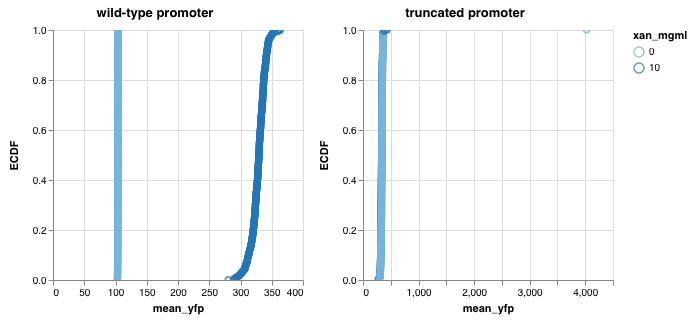

In [4]:
wt = altcat.catplot(snaps[(snaps['strain']=='auto') &
                        (snaps['promoter']=='wt')],
                width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:O'),
                transform='ecdf',
                   **(dict(title='wild-type promoter'))).interactive()
simple = altcat.catplot(snaps[(snaps['strain']=='auto') &
                            (snaps['promoter']=='simple')],
                width=250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:O'),
                transform='ecdf', **(dict(title='truncated promoter'))).interactive()

wt | simple

It looks like I have the same mixup here as well. For this data set, we'll use the median YFP signal for the truncated promoter with 0 mg/mL xanthosine as the autofluorescence value 

## ∆xapABR YFP Expression

In looking at the images, there was a curious find that the expression of YFP for the delta strains were markedly different for the two promoters. We can look at the distributions in essentially the same way

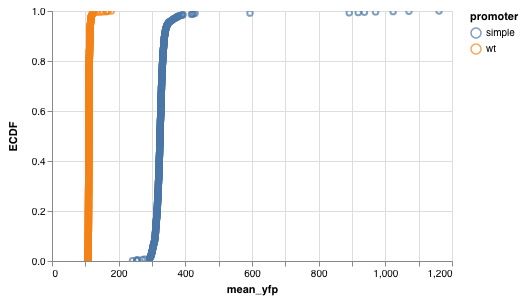

In [5]:
altcat.catplot(snaps[snaps['strain']=='delta'],
                width = 400, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='promoter:N'),
                transform='ecdf').interactive()
                   

Under the microscope, what I thought was bimodality looks more like regular, run of the mill contamination.  

## ATC Dependence

We can examine how the expression of xapR-mCherry is dependent on ATC

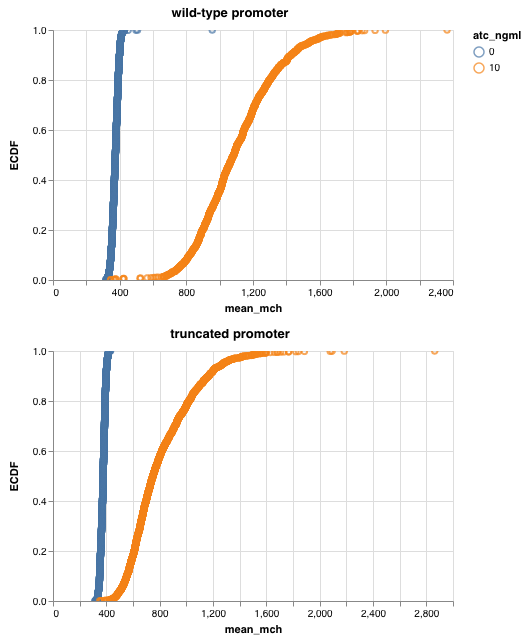

In [6]:
wt = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                        (snaps['promoter']=='wt')],
                width = 400, height=250,
                mark='point',
                encoding=dict(x='mean_mch:Q', color='atc_ngml:N'),
                transform='ecdf',
                   **(dict(title='wild-type promoter'))).interactive()
simple = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                            (snaps['promoter']=='simple')],
                width=400, height=250,
                mark='point',
                encoding=dict(x='mean_mch:Q', color='atc_ngml:O'),
                transform='ecdf', **(dict(title='truncated promoter'))).interactive()

wt & simple

The expression profile with respect to ATC is promising -- it looks very similar between the two concentrations. Looking at the medians, between 0 and 10 ng/mL, there is approximately a 2-3x change in expression. Hopefully that is enough! it will really depend on how bright the calibration factor is. 

## Xanthosine Dependence
Now this is the sweet stuff. Let's see how the expression changes with titrating xanthosine

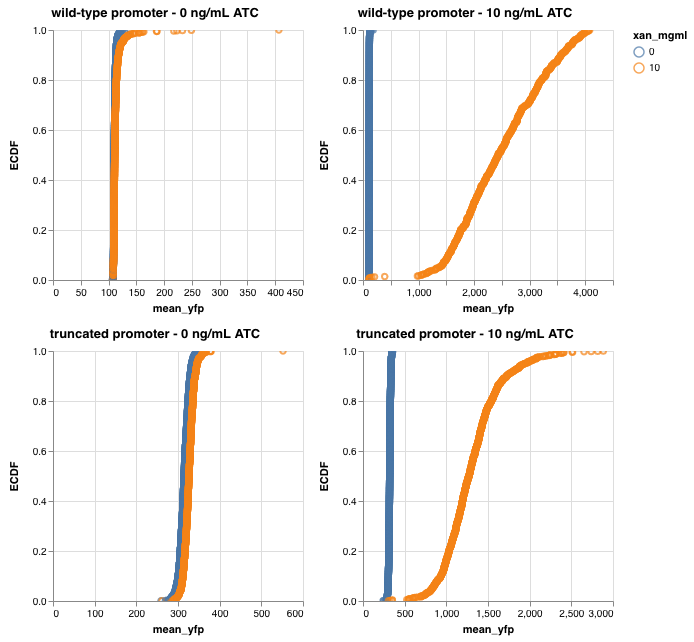

In [99]:
wt_low_atc = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                        (snaps['promoter']=='wt') & (snaps['atc_ngml']==0)],
                 width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:N'),
                transform='ecdf',
                   **(dict(title='wild-type promoter - 0 ng/mL ATC'))).interactive()

wt_high_atc = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                        (snaps['promoter']=='wt') & (snaps['atc_ngml']==10)],
                 width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:N'),
                transform='ecdf',
                   **(dict(title='wild-type promoter - 10 ng/mL ATC'))).interactive()

simple_low_atc = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                        (snaps['promoter']=='simple') & (snaps['atc_ngml']==0)],
                 width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:N'),
                transform='ecdf',
                   **(dict(title='truncated promoter - 0 ng/mL ATC'))).interactive()

simple_high_atc = altcat.catplot(snaps[(snaps['strain']=='dilution') &
                        (snaps['promoter']=='simple') & (snaps['atc_ngml']==10)],
                 width = 250, height=250,
                mark='point',
                encoding=dict(x='mean_yfp:Q', color='xan_mgml:N'),
                transform='ecdf',
                   **(dict(title='truncated promoter - 10 ng/mL ATC'))).interactive()



(wt_low_atc | wt_high_atc)  & (simple_low_atc | simple_high_atc)

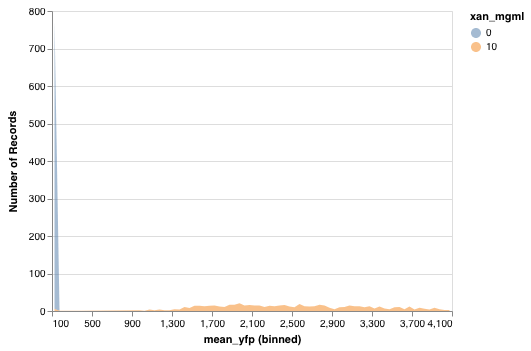

In [109]:
alt.Chart(snaps[(snaps['promoter']=='wt') & (snaps['strain']=='dilution') & (snaps['atc_ngml'] == 10)]).mark_area(opacity=0.5).encode(
    x=alt.X('mean_yfp:Q' , bin=alt.Bin(maxbins=100)),
    y=alt.Y('count()'),
color='xan_mgml:N').interactive()

## Inferring the fluorescence calibration factor

By examining the fluctations in intensity between daughter cells, we can directly calculate the fluorescence calibration factor. 

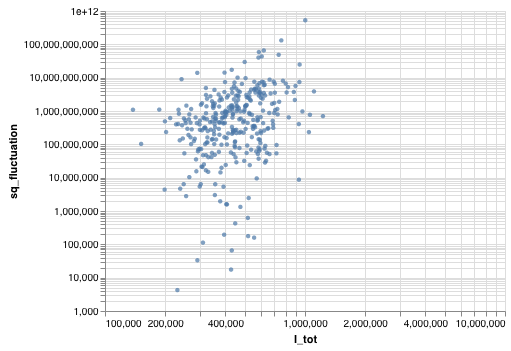

In [30]:
lineage = pd.read_csv('output/20190122_lineages.csv')
# Subtract the fluctuations. 
lineage['I_1_tot'] = (lineage['I_1'] - lineage['autofluorescence']) * lineage['area_1']
lineage['I_2_tot'] = (lineage['I_2'] - lineage['autofluorescence']) * lineage['area_2']

# Prune the data. 
lineage = lineage[(lineage['I_1_tot'] >= 0) & (lineage['I_2_tot'] >= 0)]

# Compute the fluctuations for plotting. 
lineage['I_tot'] = lineage['I_1_tot'] + lineage['I_2_tot']
lineage['sq_fluctuation'] = (lineage['I_1_tot'] - lineage['I_2_tot'])**2

# Plot the fluctuations. 
alt.Chart(lineage[lineage['I_tot'] > 0]).mark_point(filled=True, size=20).encode(
        x=alt.X('I_tot:Q', scale={'type':'log'}),
        y=alt.Y('sq_fluctuation:Q', scale={'type':'log'})).interactive()

The scatter is more or less what I would expect -- it's a bit hard to see with only one ATC concentration. 

We'll perform the inference using a precompiled model in Stan.

In [36]:
# Load the stan model. 
model = act.bayes.StanModel('../../stan/calibration_factor.stan')

# Define the data dictionary. 
data_dict = {'N': len(lineage),
            'I1': lineage['I_1_tot'],
            'I2': lineage['I_2_tot']}

# Sample it 
samples, samples_df = model.sample(data_dict)

Found precompiled model. Loading...
finished!
Beginning sampling...


finished sampling!


In [51]:
# Look at the results
p = bebi103.viz.corner(samples_df, vars=['alpha', 'alpha_raw', 'tau'])
bokeh.io.show(p)

The results look okay -- it seems like the calibration factor is around 6700 a.u. / molecule. We can explicitly compute the median of the samples and use that to calculate the repressor copy number for the snaps.  

In [47]:
alpha_mu = np.median(samples_df['alpha'])
hpd = act.stats.compute_hpd(samples_df['alpha'], 0.95)
print(f"""
Estimate for the calibration factor is α = {alpha_mu:0.0f} + {alpha_mu - hpd[0]:0.0f} - {hpd[1] - alpha_mu:0.0f} a.u. / molecule. 
""")


Estimate for the calibration factor is α = 6767 + 1010 - 957 a.u. / molecule. 



This measurement is reasonable  with a 10% error. This is what I am used to for this analysis. Given this measurement, we can now calculate the number of activators per cell.  

In [80]:
snaps['activators'] = (snaps['mean_mch'] - lineage['autofluorescence'].mean()) * snaps['area_pix'] / alpha_mu

## Correlations Between Copy Number and YFP Expression
Now that we have a  way to meausre the number of repressors per cell, we can examine if there is any correlation between xapR copy number and YFP expression. 

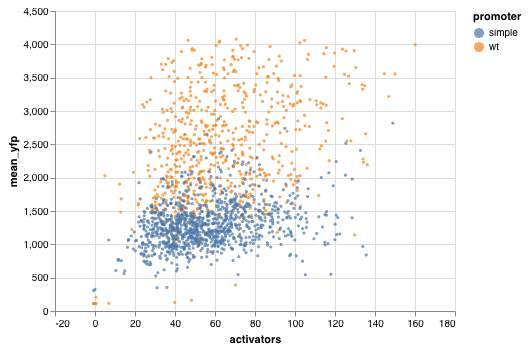

In [82]:
alt.Chart(snaps[(snaps['strain']=='dilution') & (snaps['xan_mgml']==10) & (snaps['atc_ngml']==10)]
         ).mark_point(filled=True, size=10).encode(
            x='activators:Q', y='mean_yfp:Q', color='promoter')

I'm not sure if I am interpreting this correctly, so lets hold off on that for a minute.  

## Computing fold-change

With a measure of repressors, we are ready to calculate the fold change. First step is to subtract the YFP autofluorescence from each promoter.

In [115]:
# Subtract YFP autofluorescence from each sample. We will use the 10mg/mL samples for this
sub_dfs = []
for g, d in snaps.groupby(['promoter']):
    d = d.copy()
    mean_auto_yfp = d[(d['strain']=='auto') & (d['xan_mgml']==10)]['mean_yfp'].mean()
    d['corrected_yfp'] = d['mean_yfp']
        
    # Compute the fold-change. 
    mean_delta = d[d['strain']=='delta']['corrected_yfp'].mean()
    d['fold_change'] = d['corrected_yfp'].values / mean_delta
    
    sub_dfs.append(d)
fc_df = pd.concat(sub_dfs)

# Restrict the data set to positive values for repressors and corrected_yfp
fc_df = fc_df[(fc_df['activators'] >= 0) & (fc_df['corrected_yfp'] >=0)]

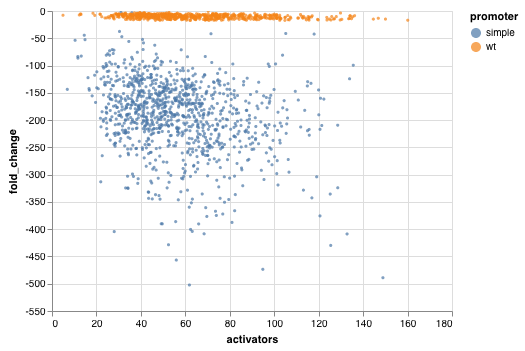

In [114]:
alt.Chart(fc_df[(fc_df['atc_ngml'] == 10) & (fc_df['strain']=='dilution') & (fc_df['xan_mgml']==10)]).mark_point(filled=True, size=10).encode(
                x=alt.X('activators:Q'),
                y='fold_change:Q', color='promoter:N').interactive()

In [112]:
fc_df['date'] = 20190122
fc_df.to_csv('output/20190122_foldchange.csv', index=False)